In [60]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from datetime import datetime


In [61]:

# Define ticker and date range
ticker = 'AAPL'  # Apple stock (change this to any ticker you want)
start_date = '2019-10-01'  # Start date for the last 5 years
end_date = '2024-10-31'  # End date until October 2024


In [62]:

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)['Close'].values


[*********************100%***********************]  1 of 1 completed


In [63]:

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))


In [64]:

# Prepare sequences for training
look_back = 60  # Number of previous days to use for forecasting
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i])  # Use last 'look_back' days for input
    y.append(data_scaled[i])  # The next day's price is the target
X, y = np.array(X), np.array(y)


In [65]:


# Split into training and testing datasets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [74]:

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output a single value (predicted price)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - loss: 0.0699 - val_loss: 0.0027
Epoch 2/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0033 - val_loss: 0.0066
Epoch 3/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 4/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 6/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 7/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 8/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 9/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 10/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 11/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 9.9953e-04 - val_loss: 0.0018
Epoch 12/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - l

In [77]:

# Forecast for November 2024 (next 30 days)
forecast_steps = 21
inputs = X_test[-1].reshape(1, -1, 1)  # Use the last test sequence to start forecasting
forecasted = []
for _ in range(forecast_steps):
    pred = model.predict(inputs)
    forecasted.append(pred[0])
    inputs = np.append(inputs[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

forecasted = scaler.inverse_transform(np.array(forecasted).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [78]:

# Fetch actual data for November 2024
actual_november_data = yf.download(ticker, start='2024-11-01', end='2024-11-30')['Close'].values


[*********************100%***********************]  1 of 1 completed


In [79]:

# Calculate RMSE (Root Mean Squared Error) between forecasted and actual values
rmse = np.sqrt(mean_squared_error(actual_november_data, forecasted.flatten()))

# Calculate accuracy as percentage
accuracy = (1 - (rmse / np.mean(actual_november_data))) * 100

# Print RMSE and accuracy
print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [20, 21]

[*********************100%***********************]  1 of 1 completed


ValueError: x and y must have same first dimension, but have shapes (21,) and (20, 1)

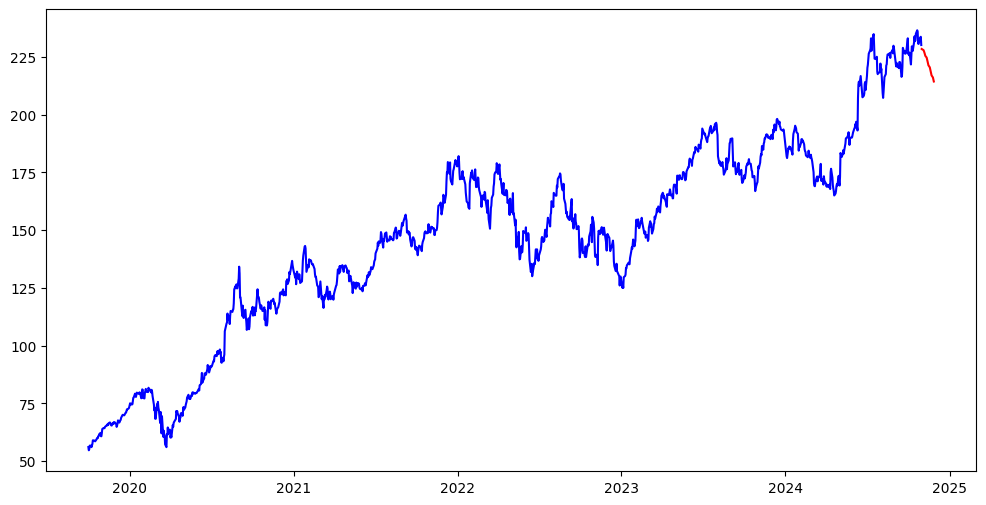

In [76]:
# Combine historical data, forecasted data, and actual data for plotting
historical_dates = yf.download(ticker, start=start_date, end=end_date).index
forecasted_dates = pd.date_range(start=historical_dates[-1], periods=forecast_steps+1, freq='B')[1:]
actual_dates = pd.date_range(start='2024-11-01', end='2024-11-30', freq='B')

# Plot the historical data, forecasted data, and actual data
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, data, label='Historical Data (2019-2024)', color='blue')
plt.plot(forecasted_dates, forecasted, label='Forecasted Data for November 2024', color='red')
plt.plot(actual_dates, actual_november_data, label='Actual Data for November 2024', color='green')
plt.title(f'{ticker} Historical Data vs Forecasted Data vs Actual Data for November 2024')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()